# Import libraries

In [299]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read datasets

In [300]:
DIR = "./data/"

In [301]:
# data_path = os.path.join(DIR, "")

In [302]:
card_base = pd.read_excel(f'{DIR}/CardBase.xlsx')
card_base

Card_Number Card_Family  Credit_Limit  Cust_ID
0    8638-5407-3631-8196     Premium        530000  CC67088
1    7106-4239-7093-1515        Gold         18000  CC12076
2    6492-5655-8241-3530     Premium        596000  CC97173
3    2868-5606-5152-5706        Gold         27000  CC55858
4    1438-6906-2509-8219    Platinum        142000  CC90518
..                   ...         ...           ...      ...
495  4708-4407-9601-6022     Premium        691000  CC64993
496  6042-2856-7280-2925        Gold         33000  CC26787
497  8706-3809-5167-3899     Premium        144000  CC32532
498  9540-8558-5897-5046     Premium        830000  CC90246
499  5587-7265-8118-7718        Gold         24000  CC37803

[500 rows x 4 columns]

In [303]:
transaction_base = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="TransactionBase")
transaction_base

Transaction_ID Transaction_Date       Credit_Card_ID  Transaction_Value  \
0      CTID28830551       2016-04-24  1629-9566-3285-2123              23649   
1      CTID45504917       2016-02-11  3697-6001-4909-5350              26726   
2      CTID47312290       2016-11-01  5864-4475-3659-1440              22012   
3      CTID25637718       2016-01-28  5991-4421-8476-3804              37637   
4      CTID66743960       2016-03-17  1893-8853-9900-8478               5113   
...             ...              ...                  ...                ...   
9995   CTID25037573       2016-06-10  9157-2802-8374-1145              44280   
9996   CTID43832298       2016-05-23  7416-4529-6690-5703              27163   
9997   CTID56532072       2016-08-06  6699-2639-4522-6219              36424   
9998   CTID88101446       2016-10-10  8341-5263-4582-7396               8464   
9999   CTID64730271       2016-06-18  1947-8602-1695-7503               7606   

     Transaction_Segment  
0                  SEG25  
1                  SEG16  
2                  SEG14  
3                  SEG17  
4                  SEG14  
...                  ...  
9995               SEG18  
9996               SEG12  
9997               SEG13  
9998               SEG14  
9999               SEG15  

[10000 rows x 5 columns]

In [304]:
transaction_base.dtypes

Transaction_ID                 object
Transaction_Date       datetime64[ns]
Credit_Card_ID                 object
Transaction_Value               int64
Transaction_Segment            object
dtype: object

In [305]:
fraud_base = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="FraudBase")
fraud_base

Transaction_ID  Fraud_Flag
0     CTID50558449           1
1     CTID55936882           1
2     CTID63762180           1
3     CTID76723439           1
4     CTID21246201           1
..             ...         ...
104   CTID57993591           1
105   CTID91108283           1
106   CTID30494187           1
107   CTID51301522           1
108   CTID49517337           1

[109 rows x 2 columns]

In [306]:
card_base_2 = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="CardBase")
card_base_2

Card_Number Card_Family  Credit_Limit  Cust_ID
0    8638-5407-3631-8196     Premium        530000  CC67088
1    7106-4239-7093-1515        Gold         18000  CC12076
2    6492-5655-8241-3530     Premium        596000  CC97173
3    2868-5606-5152-5706        Gold         27000  CC55858
4    1438-6906-2509-8219    Platinum        142000  CC90518
..                   ...         ...           ...      ...
495  4708-4407-9601-6022     Premium        691000  CC64993
496  6042-2856-7280-2925        Gold         33000  CC26787
497  8706-3809-5167-3899     Premium        144000  CC32532
498  9540-8558-5897-5046     Premium        830000  CC90246
499  5587-7265-8118-7718        Gold         24000  CC37803

[500 rows x 4 columns]

#### so card base 2 read from credit card data is the same as above

In [307]:
card_base_2.all() == card_base.all()

Card_Number     True
Card_Family     True
Credit_Limit    True
Cust_ID         True
dtype: bool

In [308]:
customer_base = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="CustomerBase")
customer_base

Cust_ID  Age Customer_Segment Customer_Vintage_Group
0     CC25034   35          Diamond                    VG1
1     CC59625   22          Diamond                    VG1
2     CC69314   33          Diamond                    VG1
3     CC67036   46          Diamond                    VG1
4     CC25597   44          Diamond                    VG1
...       ...  ...              ...                    ...
5669  CC53430   27         Platinum                    VG2
5670  CC31823   33         Platinum                    VG2
5671  CC15335   28         Platinum                    VG2
5672  CC81556   26         Platinum                    VG2
5673  CC38634   21         Platinum                    VG2

[5674 rows x 4 columns]

In [309]:
customer_base_2 = pd.read_excel(f'{DIR}/CustomerBase.xlsx')
customer_base_2

Cust_ID  Age Customer_Segment Customer_Vintage_Group
0     CC25034   35          Diamond                    VG1
1     CC59625   22          Diamond                    VG1
2     CC69314   33          Diamond                    VG1
3     CC67036   46          Diamond                    VG1
4     CC25597   44          Diamond                    VG1
...       ...  ...              ...                    ...
5669  CC53430   27         Platinum                    VG2
5670  CC31823   33         Platinum                    VG2
5671  CC15335   28         Platinum                    VG2
5672  CC81556   26         Platinum                    VG2
5673  CC38634   21         Platinum                    VG2

[5674 rows x 4 columns]

In [310]:
customer_base_2.all() == customer_base.all()

Cust_ID                   True
Age                       True
Customer_Segment          True
Customer_Vintage_Group    True
dtype: bool

In [311]:
fraud_base_2 = pd.read_excel(f"{DIR}/FraudBase.xlsx")
fraud_base_2

Transaction_ID  Fraud_Flag
0     CTID50558449           1
1     CTID55936882           1
2     CTID63762180           1
3     CTID76723439           1
4     CTID21246201           1
..             ...         ...
104   CTID57993591           1
105   CTID91108283           1
106   CTID30494187           1
107   CTID51301522           1
108   CTID49517337           1

[109 rows x 2 columns]

In [312]:
fraud_base_2.dtypes

Transaction_ID    object
Fraud_Flag         int64
dtype: object

In [313]:
fraud_base_2.all() == fraud_base.all()

Transaction_ID    True
Fraud_Flag        True
dtype: bool

In [314]:
transaction_base_2 = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="TransactionBase")
transaction_base_2

Transaction_ID Transaction_Date       Credit_Card_ID  Transaction_Value  \
0      CTID28830551       2016-04-24  1629-9566-3285-2123              23649   
1      CTID45504917       2016-02-11  3697-6001-4909-5350              26726   
2      CTID47312290       2016-11-01  5864-4475-3659-1440              22012   
3      CTID25637718       2016-01-28  5991-4421-8476-3804              37637   
4      CTID66743960       2016-03-17  1893-8853-9900-8478               5113   
...             ...              ...                  ...                ...   
9995   CTID25037573       2016-06-10  9157-2802-8374-1145              44280   
9996   CTID43832298       2016-05-23  7416-4529-6690-5703              27163   
9997   CTID56532072       2016-08-06  6699-2639-4522-6219              36424   
9998   CTID88101446       2016-10-10  8341-5263-4582-7396               8464   
9999   CTID64730271       2016-06-18  1947-8602-1695-7503               7606   

     Transaction_Segment  
0                  SEG25  
1                  SEG16  
2                  SEG14  
3                  SEG17  
4                  SEG14  
...                  ...  
9995               SEG18  
9996               SEG12  
9997               SEG13  
9998               SEG14  
9999               SEG15  

[10000 rows x 5 columns]

In [315]:
transaction_base.all() == transaction_base_2.all()

C:\Users\LARRY\AppData\Local\Temp\ipykernel_28828\3518029523.py:1: FutureWarning: 'all' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).all() instead.
  transaction_base.all() == transaction_base_2.all()
C:\Users\LARRY\AppData\Local\Temp\ipykernel_28828\3518029523.py:1: FutureWarning: 'all' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).all() instead.
  transaction_base.all() == transaction_base_2.all()


Transaction_ID         True
Transaction_Date       True
Credit_Card_ID         True
Transaction_Value      True
Transaction_Segment    True
dtype: bool

#### so `.csv` and `.xlsx` files of the same name like pairs `CardBase.csv` and `CardBase.xlsx` contain the same data and number of rows as with the sheets of the `CreditCardData.xlsx`

#### There are common columns in each dataframe that are common columns in other dataframes. It'd be better to merge these on those columns

In [316]:
from utilities.preprocessors import column_summary

In [317]:
column_summary(card_base)

col_name col_dtype  num_of_nulls  num_of_non_nulls  \
0   Card_Number    object             0               500   
1   Card_Family    object             0               500   
2  Credit_Limit     int64             0               500   
3       Cust_ID    object             0               500   

   num_of_distinct_values                             distinct_values_counts  
0                     500  {'5587-7265-8118-7718': 1, '8638-5407-3631-819...  
1                       3     {'Premium': 207, 'Gold': 181, 'Platinum': 112}  
2                     293  {30000: 9, 34000: 7, 20000: 7, 50000: 7, 28000...  
3                     482  {'CC50434': 2, 'CC78221': 2, 'CC60926': 2, 'CC...

In [318]:
column_summary(fraud_base)

col_name col_dtype  num_of_nulls  num_of_non_nulls  \
0  Transaction_ID    object             0               109   
1      Fraud_Flag     int64             0               109   

   num_of_distinct_values                             distinct_values_counts  
0                     109  {'CTID50558449': 1, 'CTID55936882': 1, 'CTID63...  
1                       1                                           {1: 109}

In [319]:
column_summary(transaction_base)

col_name       col_dtype  num_of_nulls  num_of_non_nulls  \
0       Transaction_ID          object             0             10000   
1     Transaction_Date  datetime64[ns]             0             10000   
2       Credit_Card_ID          object             0             10000   
3    Transaction_Value           int64             0             10000   
4  Transaction_Segment          object             0             10000   

   num_of_distinct_values                             distinct_values_counts  
0                   10000  {'CTID97959218': 1, 'CTID93430766': 1, 'CTID33...  
1                     366  {2016-11-25 00:00:00: 43, 2016-09-02 00:00:00:...  
2                     500  {'9558-5469-2562-5608': 34, '3440-1978-8156-53...  
3                    9035  {11920: 4, 15247: 4, 35410: 4, 4891: 4, 12238:...  
4                      15  {'SEG23': 708, 'SEG12': 695, 'SEG25': 693, 'SE...

In [320]:
column_summary(customer_base)

col_name col_dtype  num_of_nulls  num_of_non_nulls  \
0                 Cust_ID    object             0              5674   
1                     Age     int64             0              5674   
2        Customer_Segment    object             0              5674   
3  Customer_Vintage_Group    object             0              5674   

   num_of_distinct_values                             distinct_values_counts  
0                    5674  {'CC38634': 1, 'CC25034': 1, 'CC59625': 1, 'CC...  
1                      31  {27: 214, 32: 205, 50: 203, 25: 196, 36: 195, ...  
2                       3  {'Diamond': 2524, 'Gold': 1839, 'Platinum': 1311}  
3                       3            {'VG1': 2524, 'VG3': 1839, 'VG2': 1311}

# Merge common columns

In [321]:
temp = pd.merge(transaction_base, fraud_base, how="left", on="Transaction_ID")
temp

Transaction_ID Transaction_Date       Credit_Card_ID  Transaction_Value  \
0      CTID28830551       2016-04-24  1629-9566-3285-2123              23649   
1      CTID45504917       2016-02-11  3697-6001-4909-5350              26726   
2      CTID47312290       2016-11-01  5864-4475-3659-1440              22012   
3      CTID25637718       2016-01-28  5991-4421-8476-3804              37637   
4      CTID66743960       2016-03-17  1893-8853-9900-8478               5113   
...             ...              ...                  ...                ...   
9995   CTID25037573       2016-06-10  9157-2802-8374-1145              44280   
9996   CTID43832298       2016-05-23  7416-4529-6690-5703              27163   
9997   CTID56532072       2016-08-06  6699-2639-4522-6219              36424   
9998   CTID88101446       2016-10-10  8341-5263-4582-7396               8464   
9999   CTID64730271       2016-06-18  1947-8602-1695-7503               7606   

     Transaction_Segment  Fraud_Flag  
0                  SEG25         NaN  
1                  SEG16         NaN  
2                  SEG14         NaN  
3                  SEG17         NaN  
4                  SEG14         NaN  
...                  ...         ...  
9995               SEG18         NaN  
9996               SEG12         NaN  
9997               SEG13         NaN  
9998               SEG14         NaN  
9999               SEG15         NaN  

[10000 rows x 6 columns]

In [322]:
temp_2 = pd.merge(customer_base, card_base, on=["Cust_ID"], how="left")
temp_2

Cust_ID  Age Customer_Segment Customer_Vintage_Group Card_Number  \
0     CC25034   35          Diamond                    VG1         NaN   
1     CC59625   22          Diamond                    VG1         NaN   
2     CC69314   33          Diamond                    VG1         NaN   
3     CC67036   46          Diamond                    VG1         NaN   
4     CC25597   44          Diamond                    VG1         NaN   
...       ...  ...              ...                    ...         ...   
5687  CC53430   27         Platinum                    VG2         NaN   
5688  CC31823   33         Platinum                    VG2         NaN   
5689  CC15335   28         Platinum                    VG2         NaN   
5690  CC81556   26         Platinum                    VG2         NaN   
5691  CC38634   21         Platinum                    VG2         NaN   

     Card_Family  Credit_Limit  
0            NaN           NaN  
1            NaN           NaN  
2            NaN           NaN  
3            NaN           NaN  
4            NaN           NaN  
...          ...           ...  
5687         NaN           NaN  
5688         NaN           NaN  
5689         NaN           NaN  
5690         NaN           NaN  
5691         NaN           NaN  

[5692 rows x 7 columns]

In [323]:
temp_2[temp_2["Cust_ID"] == "CC24544"]

Cust_ID  Age Customer_Segment Customer_Vintage_Group  \
3431  CC24544   23             Gold                    VG3   

              Card_Number Card_Family  Credit_Limit  
3431  1629-9566-3285-2123    Platinum      194000.0

In [324]:
temp["Credit_Card_ID"]

0       1629-9566-3285-2123
1       3697-6001-4909-5350
2       5864-4475-3659-1440
3       5991-4421-8476-3804
4       1893-8853-9900-8478
               ...         
9995    9157-2802-8374-1145
9996    7416-4529-6690-5703
9997    6699-2639-4522-6219
9998    8341-5263-4582-7396
9999    1947-8602-1695-7503
Name: Credit_Card_ID, Length: 10000, dtype: object

#### We can merge on the transaction domain table and the customer domain table on their columns `Credit_Card_ID` and `Card_Number`, since this is a dummy dataset we can think of these as the same, but in real life a credit card id is different to a card number as a credit card id is the id associated with your account and the card number is associated with the number on your credit card  

In [325]:
final = pd.merge(temp, temp_2, left_on="Credit_Card_ID", right_on="Card_Number", how="left")
final

Transaction_ID Transaction_Date       Credit_Card_ID  Transaction_Value  \
0      CTID28830551       2016-04-24  1629-9566-3285-2123              23649   
1      CTID45504917       2016-02-11  3697-6001-4909-5350              26726   
2      CTID47312290       2016-11-01  5864-4475-3659-1440              22012   
3      CTID25637718       2016-01-28  5991-4421-8476-3804              37637   
4      CTID66743960       2016-03-17  1893-8853-9900-8478               5113   
...             ...              ...                  ...                ...   
9995   CTID25037573       2016-06-10  9157-2802-8374-1145              44280   
9996   CTID43832298       2016-05-23  7416-4529-6690-5703              27163   
9997   CTID56532072       2016-08-06  6699-2639-4522-6219              36424   
9998   CTID88101446       2016-10-10  8341-5263-4582-7396               8464   
9999   CTID64730271       2016-06-18  1947-8602-1695-7503               7606   

     Transaction_Segment  Fraud_Flag  Cust_ID  Age Customer_Segment  \
0                  SEG25         NaN  CC24544   23             Gold   
1                  SEG16         NaN  CC62261   48             Gold   
2                  SEG14         NaN  CC99402   23          Diamond   
3                  SEG17         NaN  CC14871   44         Platinum   
4                  SEG14         NaN  CC11165   42             Gold   
...                  ...         ...      ...  ...              ...   
9995               SEG18         NaN  CC59562   39         Platinum   
9996               SEG12         NaN  CC60164   39          Diamond   
9997               SEG13         NaN  CC85028   38             Gold   
9998               SEG14         NaN  CC81000   25         Platinum   
9999               SEG15         NaN  CC26034   42         Platinum   

     Customer_Vintage_Group          Card_Number Card_Family  Credit_Limit  
0                       VG3  1629-9566-3285-2123    Platinum      194000.0  
1                       VG3  3697-6001-4909-5350        Gold       15000.0  
2                       VG1  5864-4475-3659-1440        Gold        2000.0  
3                       VG2  5991-4421-8476-3804        Gold       19000.0  
4                       VG3  1893-8853-9900-8478     Premium      417000.0  
...                     ...                  ...         ...           ...  
9995                    VG2  9157-2802-8374-1145     Premium      656000.0  
9996                    VG1  7416-4529-6690-5703        Gold       12000.0  
9997                    VG3  6699-2639-4522-6219        Gold       34000.0  
9998                    VG2  8341-5263-4582-7396    Platinum      129000.0  
9999                    VG2  1947-8602-1695-7503        Gold       10000.0  

[10000 rows x 13 columns]

In [326]:
final = final.drop(columns="Card_Number")
final

Transaction_ID Transaction_Date       Credit_Card_ID  Transaction_Value  \
0      CTID28830551       2016-04-24  1629-9566-3285-2123              23649   
1      CTID45504917       2016-02-11  3697-6001-4909-5350              26726   
2      CTID47312290       2016-11-01  5864-4475-3659-1440              22012   
3      CTID25637718       2016-01-28  5991-4421-8476-3804              37637   
4      CTID66743960       2016-03-17  1893-8853-9900-8478               5113   
...             ...              ...                  ...                ...   
9995   CTID25037573       2016-06-10  9157-2802-8374-1145              44280   
9996   CTID43832298       2016-05-23  7416-4529-6690-5703              27163   
9997   CTID56532072       2016-08-06  6699-2639-4522-6219              36424   
9998   CTID88101446       2016-10-10  8341-5263-4582-7396               8464   
9999   CTID64730271       2016-06-18  1947-8602-1695-7503               7606   

     Transaction_Segment  Fraud_Flag  Cust_ID  Age Customer_Segment  \
0                  SEG25         NaN  CC24544   23             Gold   
1                  SEG16         NaN  CC62261   48             Gold   
2                  SEG14         NaN  CC99402   23          Diamond   
3                  SEG17         NaN  CC14871   44         Platinum   
4                  SEG14         NaN  CC11165   42             Gold   
...                  ...         ...      ...  ...              ...   
9995               SEG18         NaN  CC59562   39         Platinum   
9996               SEG12         NaN  CC60164   39          Diamond   
9997               SEG13         NaN  CC85028   38             Gold   
9998               SEG14         NaN  CC81000   25         Platinum   
9999               SEG15         NaN  CC26034   42         Platinum   

     Customer_Vintage_Group Card_Family  Credit_Limit  
0                       VG3    Platinum      194000.0  
1                       VG3        Gold       15000.0  
2                       VG1        Gold        2000.0  
3                       VG2        Gold       19000.0  
4                       VG3     Premium      417000.0  
...                     ...         ...           ...  
9995                    VG2     Premium      656000.0  
9996                    VG1        Gold       12000.0  
9997                    VG3        Gold       34000.0  
9998                    VG2    Platinum      129000.0  
9999                    VG2        Gold       10000.0  

[10000 rows x 12 columns]

In [327]:
final_summary_df = column_summary(final)
final_summary_df

col_name       col_dtype  num_of_nulls  num_of_non_nulls  \
0           Transaction_ID          object             0             10000   
1         Transaction_Date  datetime64[ns]             0             10000   
2           Credit_Card_ID          object             0             10000   
3        Transaction_Value           int64             0             10000   
4      Transaction_Segment          object             0             10000   
5               Fraud_Flag         float64          9891               109   
6                  Cust_ID          object             0             10000   
7                      Age           int64             0             10000   
8         Customer_Segment          object             0             10000   
9   Customer_Vintage_Group          object             0             10000   
10             Card_Family          object             0             10000   
11            Credit_Limit         float64             0             10000   

    num_of_distinct_values                             distinct_values_counts  
0                    10000  {'CTID97959218': 1, 'CTID93430766': 1, 'CTID33...  
1                      366  {2016-11-25 00:00:00: 43, 2016-09-02 00:00:00:...  
2                      500  {'9558-5469-2562-5608': 34, '3440-1978-8156-53...  
3                     9035  {11920: 4, 15247: 4, 35410: 4, 4891: 4, 12238:...  
4                       15  {'SEG23': 708, 'SEG12': 695, 'SEG25': 693, 'SE...  
5                        1                                         {1.0: 109}  
6                      482  {'CC50434': 56, 'CC60926': 53, 'CC91963': 49, ...  
7                       31  {41: 509, 47: 482, 30: 474, 37: 428, 48: 423, ...  
8                        3  {'Diamond': 4460, 'Gold': 3252, 'Platinum': 2288}  
9                        3            {'VG1': 4460, 'VG3': 3252, 'VG2': 2288}  
10                       3  {'Premium': 4099, 'Gold': 3636, 'Platinum': 2265}  
11                     293  {30000.0: 166, 20000.0: 154, 34000.0: 147, 280...

#### In the fraud_base dataframe trransactions labeled as fraud are the only or the rows appearing in the dataframe itself is conisdered fraud, and if it is not in the fraud_base in the first place we could consider it as non-fraud

In [328]:
num_cols = final.select_dtypes(include=[float, int]).columns
# num_cols = num_cols[num_cols != "Fraud_Flag"]
cat_cols = final.select_dtypes(include=[object, "datetime"]).columns

In [329]:
cat_cols

Index(['Transaction_ID', 'Transaction_Date', 'Credit_Card_ID',
       'Transaction_Segment', 'Cust_ID', 'Customer_Segment',
       'Customer_Vintage_Group', 'Card_Family'],
      dtype='object')

In [330]:
num_cols

Index(['Transaction_Value', 'Fraud_Flag', 'Age', 'Credit_Limit'], dtype='object')

In [331]:
final

Transaction_ID Transaction_Date       Credit_Card_ID  Transaction_Value  \
0      CTID28830551       2016-04-24  1629-9566-3285-2123              23649   
1      CTID45504917       2016-02-11  3697-6001-4909-5350              26726   
2      CTID47312290       2016-11-01  5864-4475-3659-1440              22012   
3      CTID25637718       2016-01-28  5991-4421-8476-3804              37637   
4      CTID66743960       2016-03-17  1893-8853-9900-8478               5113   
...             ...              ...                  ...                ...   
9995   CTID25037573       2016-06-10  9157-2802-8374-1145              44280   
9996   CTID43832298       2016-05-23  7416-4529-6690-5703              27163   
9997   CTID56532072       2016-08-06  6699-2639-4522-6219              36424   
9998   CTID88101446       2016-10-10  8341-5263-4582-7396               8464   
9999   CTID64730271       2016-06-18  1947-8602-1695-7503               7606   

     Transaction_Segment  Fraud_Flag  Cust_ID  Age Customer_Segment  \
0                  SEG25         NaN  CC24544   23             Gold   
1                  SEG16         NaN  CC62261   48             Gold   
2                  SEG14         NaN  CC99402   23          Diamond   
3                  SEG17         NaN  CC14871   44         Platinum   
4                  SEG14         NaN  CC11165   42             Gold   
...                  ...         ...      ...  ...              ...   
9995               SEG18         NaN  CC59562   39         Platinum   
9996               SEG12         NaN  CC60164   39          Diamond   
9997               SEG13         NaN  CC85028   38             Gold   
9998               SEG14         NaN  CC81000   25         Platinum   
9999               SEG15         NaN  CC26034   42         Platinum   

     Customer_Vintage_Group Card_Family  Credit_Limit  
0                       VG3    Platinum      194000.0  
1                       VG3        Gold       15000.0  
2                       VG1        Gold        2000.0  
3                       VG2        Gold       19000.0  
4                       VG3     Premium      417000.0  
...                     ...         ...           ...  
9995                    VG2     Premium      656000.0  
9996                    VG1        Gold       12000.0  
9997                    VG3        Gold       34000.0  
9998                    VG2    Platinum      129000.0  
9999                    VG2        Gold       10000.0  

[10000 rows x 12 columns]

# Cleaning

#### Lets fill instead all the empty values in the fraud_flag column as it is the only column with null values

In [332]:
final["Fraud_Flag"] = final["Fraud_Flag"].fillna(0)
final["Fraud_Flag"].value_counts()

Fraud_Flag
0.0    9891
1.0     109
Name: count, dtype: int64

#### Dropping duplicates not for specific columns but rows with the same values for all columns. As dropping duplicates in a specific column may not be viable as it may contain important information when aggregated

In [333]:
final.drop_duplicates(inplace=True)

In [334]:
final.describe()

Transaction_Date  Transaction_Value    Fraud_Flag  \
count                          10000       10000.000000  10000.000000   
mean   2016-07-01 18:28:13.440000256       24758.741300      0.010900   
min              2016-01-01 00:00:00         103.000000      0.000000   
25%              2016-04-02 00:00:00       12317.500000      0.000000   
50%              2016-07-01 12:00:00       24720.500000      0.000000   
75%              2016-10-02 00:00:00       37036.250000      0.000000   
max              2016-12-31 00:00:00       49995.000000      1.000000   
std                              NaN       14371.088758      0.103838   

               Age   Credit_Limit  
count  10000.00000   10000.000000  
mean      35.57120  250839.600000  
min       20.00000    2000.000000  
25%       28.00000   35000.000000  
50%       36.00000  140000.000000  
75%       43.00000  406000.000000  
max       50.00000  899000.000000  
std        8.74669  268729.432371

# Exploratory data analysis

## Univariate analysis
some important variables may be

#### Bar plot

In [335]:
from utilities.visualizers import disp_cat_feat, view_feat_outliers

['#29A77C', '#5BE07C', '#597032', '#EB02DE', '#55905A', '#184A07', '#4FA467', '#6B3865', '#743D5E', '#F9B908'] 10
<BarContainer object of 10 artists>
Transaction_ID
['#F2454A', '#A6F180', '#FC2BA2', '#3D1DCE', '#384976', '#984F4F', '#56D9EF', '#57AAA5', '#592AEF', '#613565'] 10
<BarContainer object of 10 artists>
Transaction_Date
['#3DA7AF', '#0CCA72', '#5EABFE', '#93F4C6', '#A3576F', '#1AE9AB', '#4563B4', '#325393', '#C1C255', '#DE86A7'] 10
<BarContainer object of 10 artists>
Credit_Card_ID
['#B2ED14', '#8C3482', '#562567', '#923803', '#88EDDC', '#C2FE55', '#F2F3FD', '#2855A8', '#CD74B3', '#98760A'] 10
<BarContainer object of 10 artists>
Transaction_Segment
['#807E3B', '#E6FBF8', '#D44424', '#CF777E', '#7CCC6E', '#605A41', '#77E9BD', '#C0796C', '#29F2B1', '#0B73C6'] 10
<BarContainer object of 10 artists>
Cust_ID
['#A6D33F', '#36699D', '#64457B'] 3
<BarContainer object of 3 artists>
Customer_Segment
['#C2C668', '#0238A3', '#027A2E'] 3
<BarContainer object of 3 artists>
Customer_Vintage

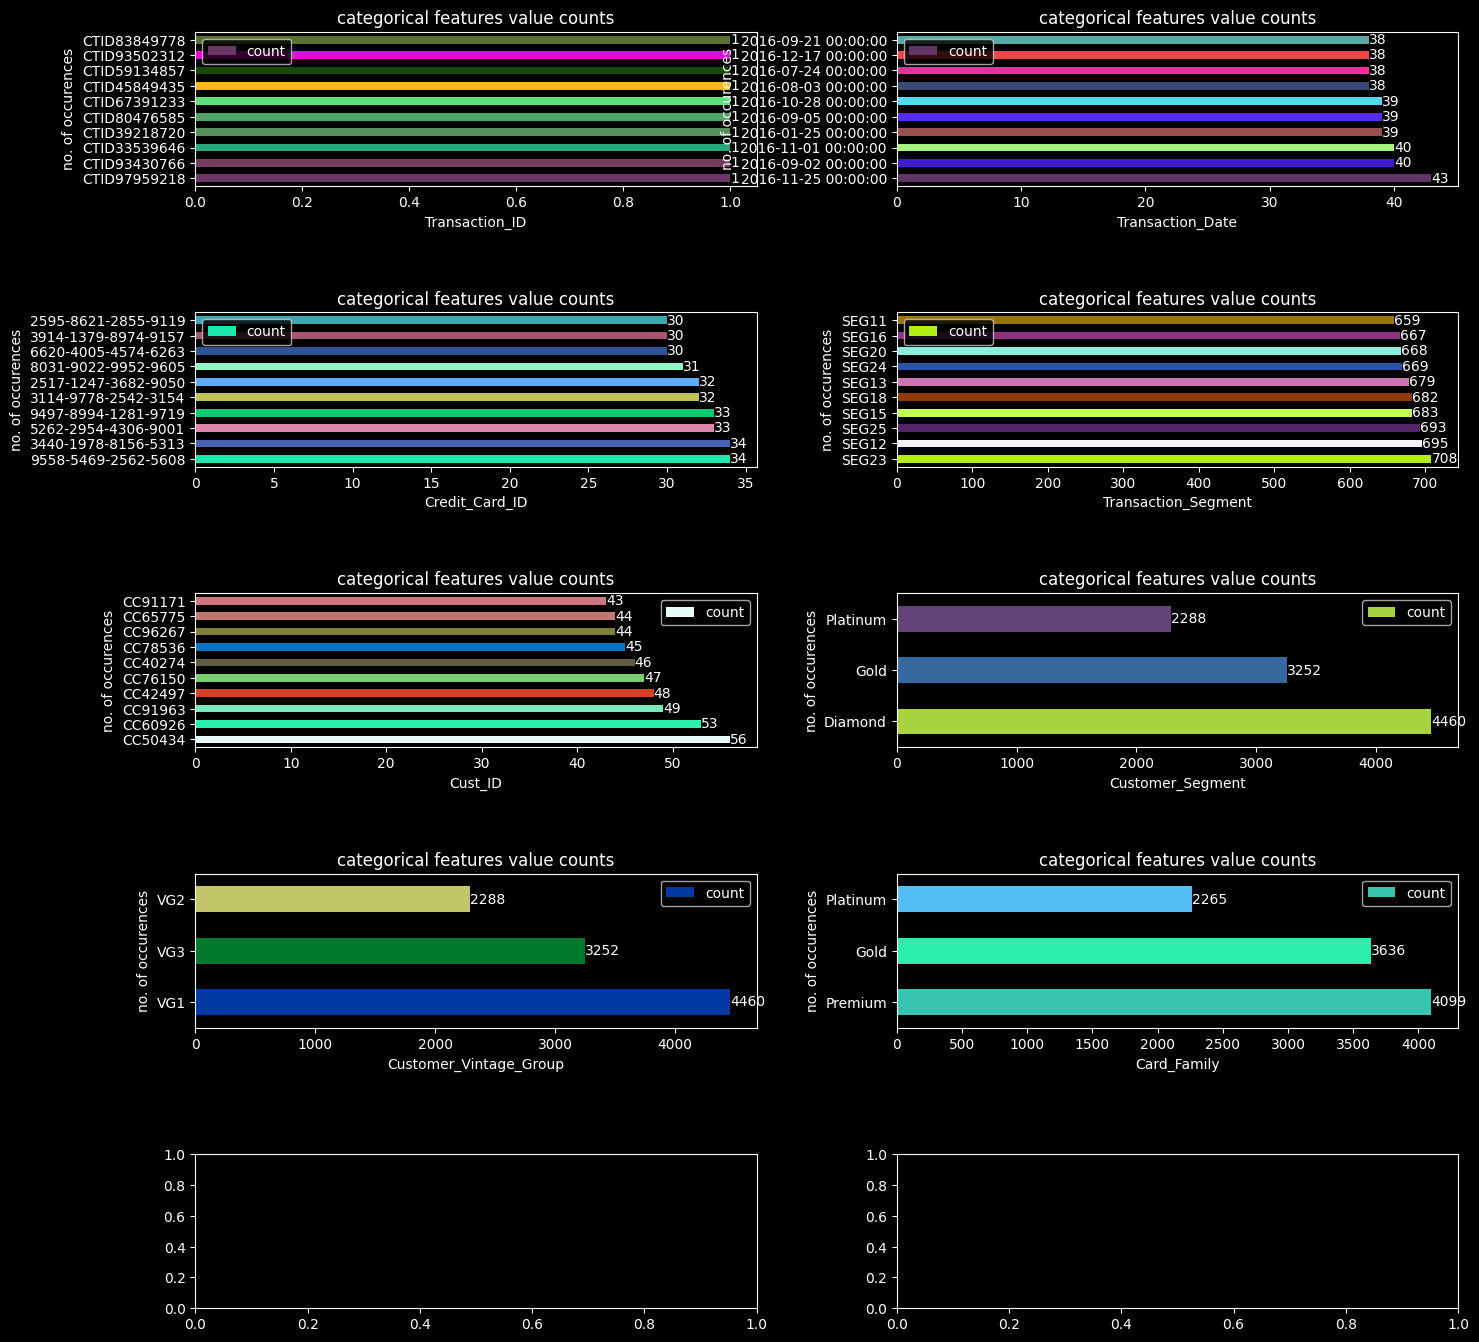

In [336]:
disp_cat_feat(final, cat_cols, fig_dims=(5, 2), img_title="categorical features value counts")

in the categorical columns we could use card_family, customer_vintage_group, customer_segment, cust_id, transaction_date, credit_card_id to ask the following questions:
* what customers flagged with fraudulent transactions is their most common card family?
* what customers flagged with fraudulent transactions is their most common customer segment?
* what customers flagged with fraudulent transactions is their most common customer vintage group?
* what is the mean, max, and min, transaction value of customers flagged with fraudulent transactions?
* conversely what is the mean, max, and min transaction value of customers with no fraudulent transactions?

#### Boxplot to see the outliers



49.0



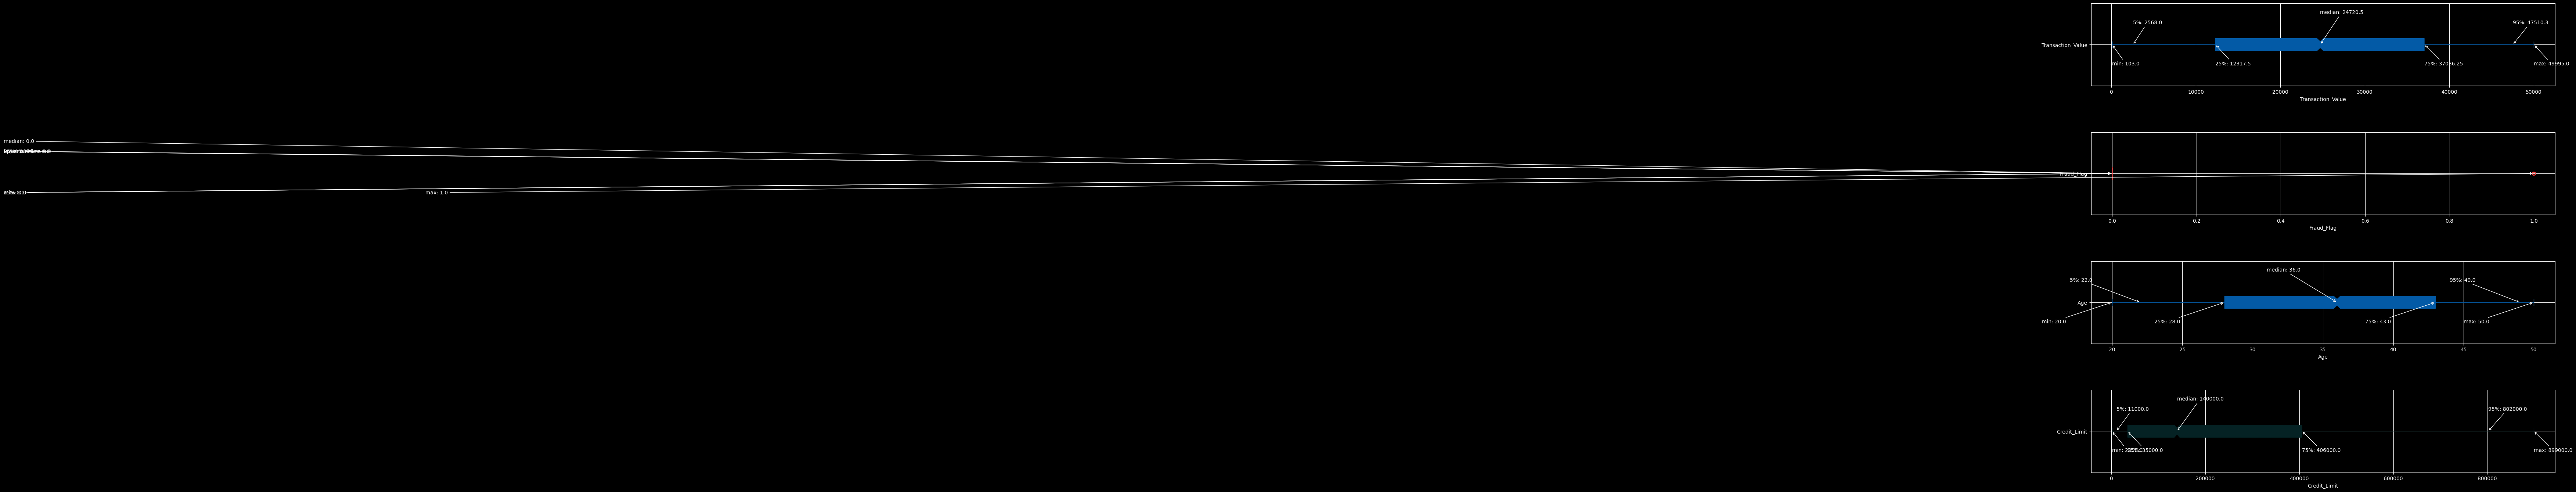

In [337]:
view_feat_outliers(final, num_cols, fig_dims=(len(num_cols), 1), img_title="numerical features outliers", style="dark")

#### histogram

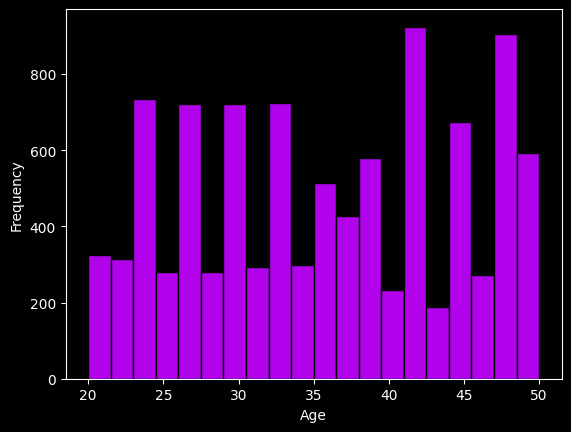

In [338]:
age_hist_axis = final["Age"].plot(kind="hist", edgecolor="black", bins=20, color="#b102eb", xlabel="Age")

#### kernel density plot

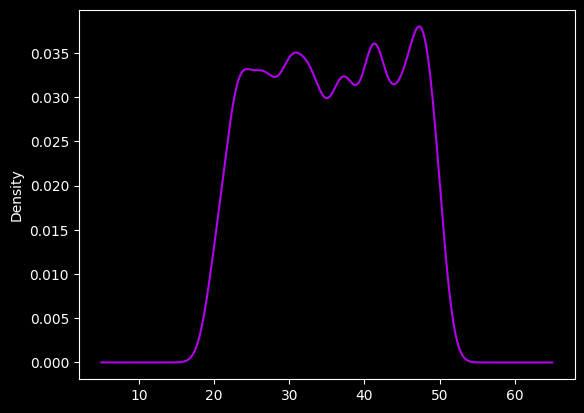

In [339]:
age_hist_axis = final["Age"].plot(kind="kde", color="#b102eb", xlabel="Age")

# Multivariate Analysis
first we have to encode the categorical columns into numerical values so that when visualized matplotlib doesn't raise an error where a string can't be converted to a float

In [340]:
from sklearn.preprocessing import OrdinalEncoder

In [341]:
oe = OrdinalEncoder()
final[cat_cols] = oe.fit_transform(final[cat_cols])

In [342]:
final

Transaction_ID  Transaction_Date  Credit_Card_ID  Transaction_Value  \
0             2015.0             114.0            26.0              23649   
1             3848.0              41.0           130.0              26726   
2             4027.0             305.0           259.0              22012   
3             1627.0              27.0           268.0              37637   
4             6208.0              76.0            41.0               5113   
...              ...               ...             ...                ...   
9995          1554.0             161.0           458.0              44280   
9996          3673.0             143.0           351.0              27163   
9997          5092.0             218.0           315.0              36424   
9998          8648.0             283.0           407.0               8464   
9999          5980.0             169.0            44.0               7606   

      Transaction_Segment  Fraud_Flag  Cust_ID  Age  Customer_Segment  \
0                    14.0         0.0     78.0   23               1.0   
1                     5.0         0.0    283.0   48               1.0   
2                     3.0         0.0    479.0   23               0.0   
3                     6.0         0.0     20.0   44               2.0   
4                     3.0         0.0      1.0   42               1.0   
...                   ...         ...      ...  ...               ...   
9995                  7.0         0.0    265.0   39               2.0   
9996                  1.0         0.0    270.0   39               0.0   
9997                  2.0         0.0    392.0   38               1.0   
9998                  3.0         0.0    376.0   25               2.0   
9999                  4.0         0.0     88.0   42               2.0   

      Customer_Vintage_Group  Card_Family  Credit_Limit  
0                        2.0          1.0      194000.0  
1                        2.0          0.0       15000.0  
2                        0.0          0.0        2000.0  
3                        1.0          0.0       19000.0  
4                        2.0          2.0      417000.0  
...                      ...          ...           ...  
9995                     1.0          2.0      656000.0  
9996                     0.0          0.0       12000.0  
9997                     2.0          0.0       34000.0  
9998                     1.0          1.0      129000.0  
9999                     1.0          0.0       10000.0  

[10000 rows x 12 columns]

In [343]:
decoded = pd.DataFrame(oe.inverse_transform(final[cat_cols]), columns=cat_cols)
decoded

Transaction_ID     Transaction_Date       Credit_Card_ID  \
0      CTID28830551  1461456000000000000  1629-9566-3285-2123   
1      CTID45504917  1455148800000000000  3697-6001-4909-5350   
2      CTID47312290  1477958400000000000  5864-4475-3659-1440   
3      CTID25637718  1453939200000000000  5991-4421-8476-3804   
4      CTID66743960  1458172800000000000  1893-8853-9900-8478   
...             ...                  ...                  ...   
9995   CTID25037573  1465516800000000000  9157-2802-8374-1145   
9996   CTID43832298  1463961600000000000  7416-4529-6690-5703   
9997   CTID56532072  1470441600000000000  6699-2639-4522-6219   
9998   CTID88101446  1476057600000000000  8341-5263-4582-7396   
9999   CTID64730271  1466208000000000000  1947-8602-1695-7503   

     Transaction_Segment  Cust_ID Customer_Segment Customer_Vintage_Group  \
0                  SEG25  CC24544             Gold                    VG3   
1                  SEG16  CC62261             Gold                    VG3   
2                  SEG14  CC99402          Diamond                    VG1   
3                  SEG17  CC14871         Platinum                    VG2   
4                  SEG14  CC11165             Gold                    VG3   
...                  ...      ...              ...                    ...   
9995               SEG18  CC59562         Platinum                    VG2   
9996               SEG12  CC60164          Diamond                    VG1   
9997               SEG13  CC85028             Gold                    VG3   
9998               SEG14  CC81000         Platinum                    VG2   
9999               SEG15  CC26034         Platinum                    VG2   

     Card_Family  
0       Platinum  
1           Gold  
2           Gold  
3           Gold  
4        Premium  
...          ...  
9995     Premium  
9996        Gold  
9997        Gold  
9998    Platinum  
9999        Gold  

[10000 rows x 8 columns]

In [344]:
decoded["Transaction_Date"].dtype

dtype('O')

In [345]:
pd.to_datetime(decoded["Transaction_Date"])

0      2016-04-24
1      2016-02-11
2      2016-11-01
3      2016-01-28
4      2016-03-17
          ...    
9995   2016-06-10
9996   2016-05-23
9997   2016-08-06
9998   2016-10-10
9999   2016-06-18
Name: Transaction_Date, Length: 10000, dtype: datetime64[ns]

In [346]:
# revert timestamp column to datetime
decoded["Transaction_Date"] = decoded["Transaction_Date"].apply(lambda timestamp: pd.to_datetime(timestamp))
decoded

Transaction_ID Transaction_Date       Credit_Card_ID Transaction_Segment  \
0      CTID28830551       2016-04-24  1629-9566-3285-2123               SEG25   
1      CTID45504917       2016-02-11  3697-6001-4909-5350               SEG16   
2      CTID47312290       2016-11-01  5864-4475-3659-1440               SEG14   
3      CTID25637718       2016-01-28  5991-4421-8476-3804               SEG17   
4      CTID66743960       2016-03-17  1893-8853-9900-8478               SEG14   
...             ...              ...                  ...                 ...   
9995   CTID25037573       2016-06-10  9157-2802-8374-1145               SEG18   
9996   CTID43832298       2016-05-23  7416-4529-6690-5703               SEG12   
9997   CTID56532072       2016-08-06  6699-2639-4522-6219               SEG13   
9998   CTID88101446       2016-10-10  8341-5263-4582-7396               SEG14   
9999   CTID64730271       2016-06-18  1947-8602-1695-7503               SEG15   

      Cust_ID Customer_Segment Customer_Vintage_Group Card_Family  
0     CC24544             Gold                    VG3    Platinum  
1     CC62261             Gold                    VG3        Gold  
2     CC99402          Diamond                    VG1        Gold  
3     CC14871         Platinum                    VG2        Gold  
4     CC11165             Gold                    VG3     Premium  
...       ...              ...                    ...         ...  
9995  CC59562         Platinum                    VG2     Premium  
9996  CC60164          Diamond                    VG1        Gold  
9997  CC85028             Gold                    VG3        Gold  
9998  CC81000         Platinum                    VG2    Platinum  
9999  CC26034         Platinum                    VG2        Gold  

[10000 rows x 8 columns]

#### Pearson correlation by checking which features are the most correlated.
Correlation is a measure of the extent of interdependence between variables/features. Causation however is the relationship between cause and effect between two variables/features.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  than determining causation as causation may require independent experimentation.

To measure correlation we have Pearson Correlation which measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where 1 entails a perfect positive linear correlation, 0 entailing no linear correlation and that the two variables most likely do not affect each other, and -1 entailing perfect negative linear correlation. Below are examples of positive and negative linear correlation.


![title](./figures%20&%20images/positive%20linear%20correlation.png)

![title](./figures%20&%20images/negative%20linear%20correlation.png)

#### pairplot

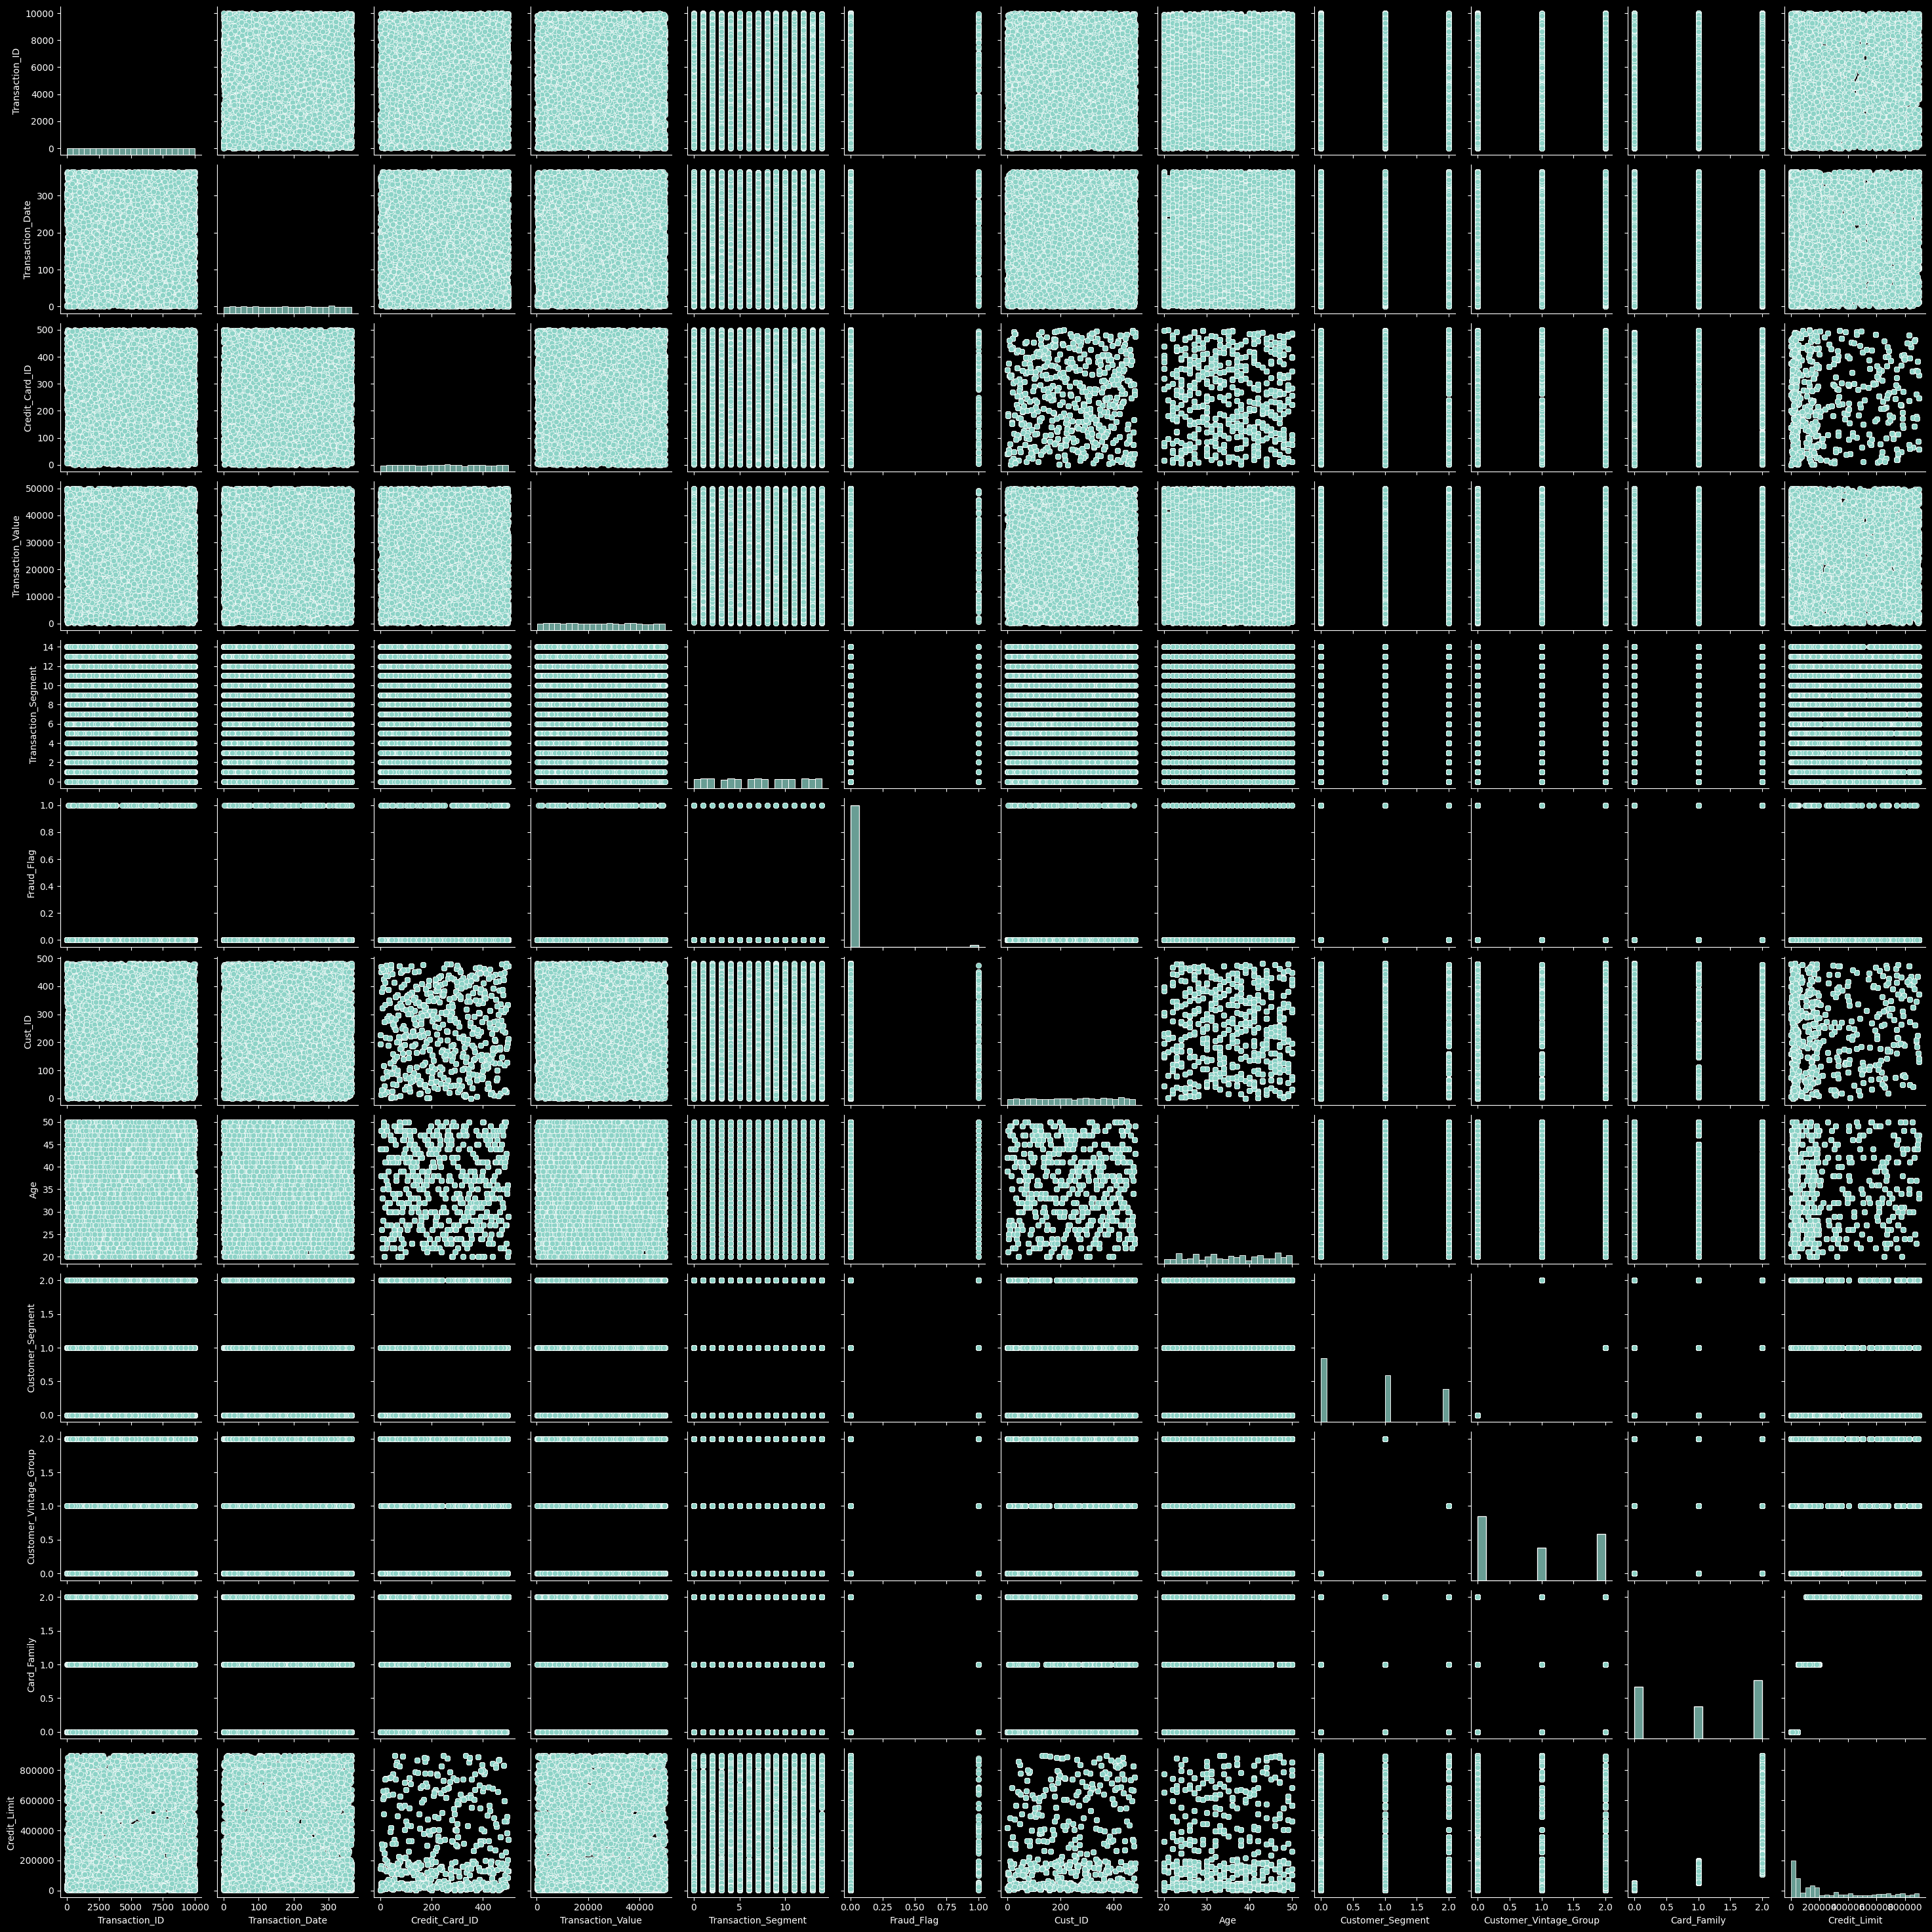

In [347]:
sb.pairplot(final)

#### heatmap
we can get the correlation matrix to see what columns are correlated and visualize it using a heatmap. Where the more a value is closer to 1 the more it is vibrant in color in the positive extreme end of the spectrum, and the more is closer to -1 the more it is vibrant in color in the negative extreme end of the spectrum. In this case the more yellow a tile is the more the corresponding columns have positive strong correlations and vice versa the more purple a tile is the more the corresponding columns have strong negative correlations 

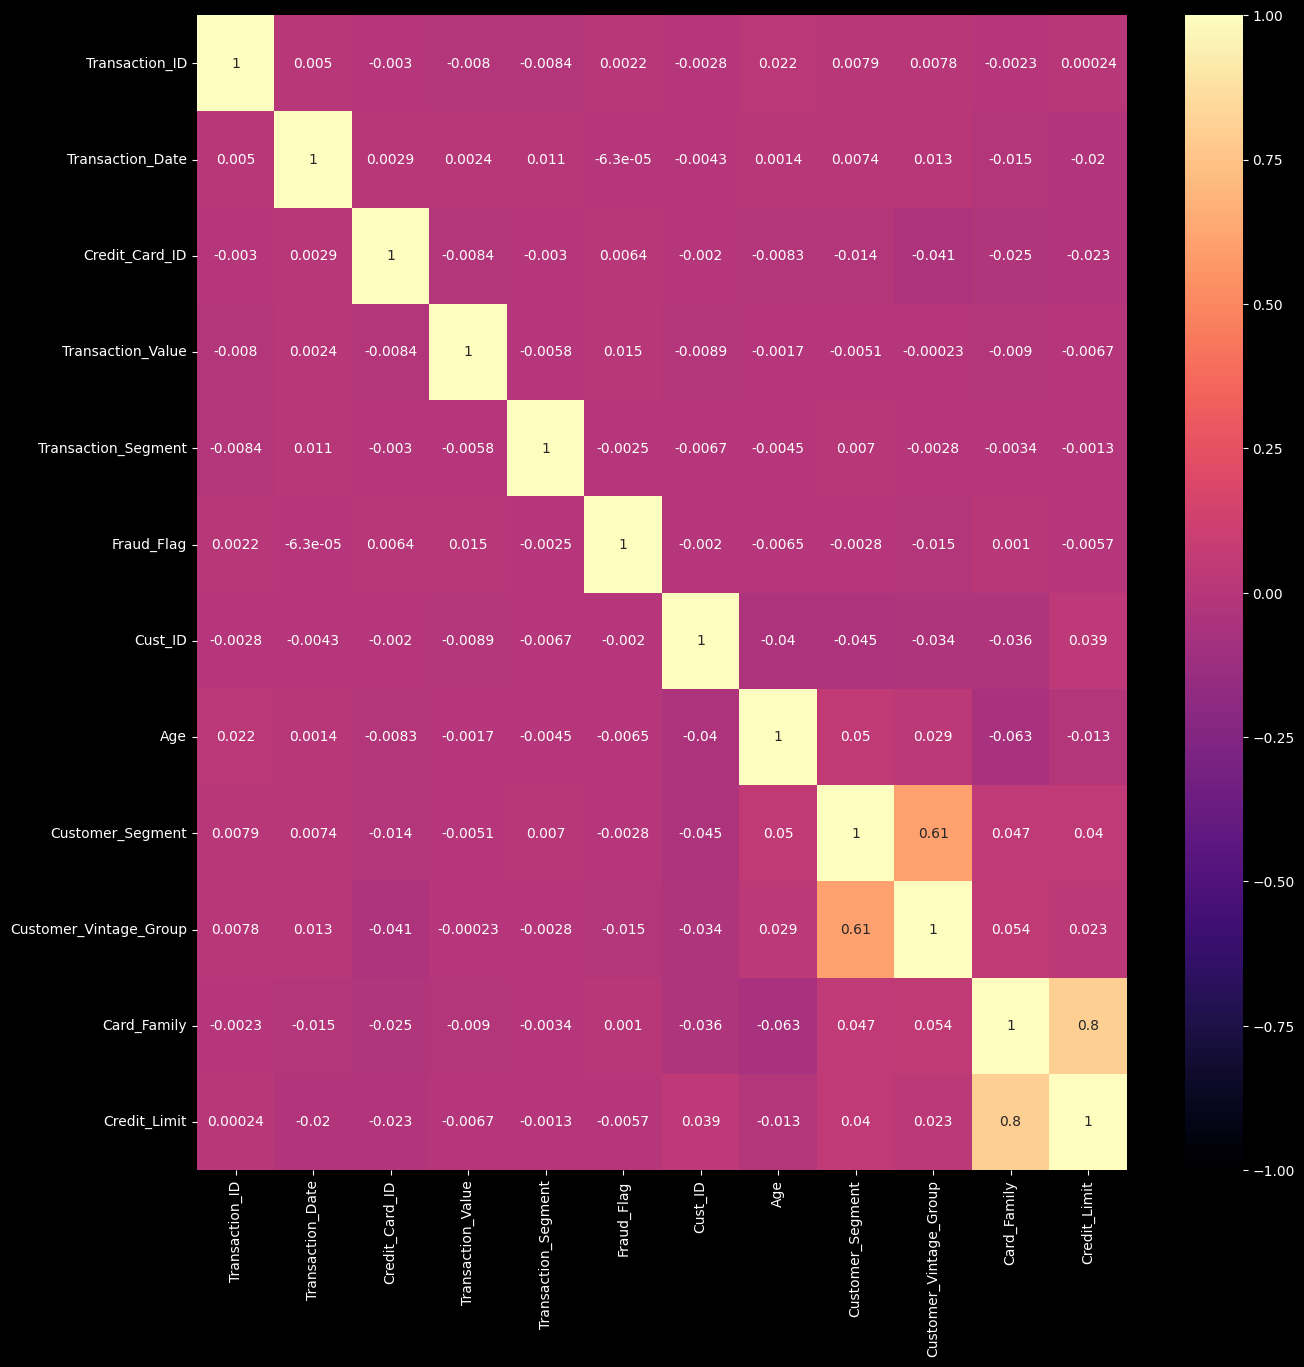

In [348]:
corr_matrix = final.corr()
fig = plt.figure(figsize=(15, 15))
corr_matrix_axis = fig.add_subplot()
sb.heatmap(corr_matrix, annot=True, ax=corr_matrix_axis, cmap="magma", vmin=-1, vmax=1)
plt.show()

As we can see there is no negative linear correlation and so it doesn't make sense to filter out with negative correlation values as they don't exist. We can however filter out the positive ones and see what column pairs give these positive correlation values. We set the cutoff of considering which value is a positive correlation to 0.5 as anything below is near 0 and we know that a 0 value or anything near it indicates that there is no correlation between two features

In [349]:
cutoff = 0.5 
pos_corrs = (corr_matrix < 1) & (corr_matrix >= cutoff)
non_zeros = corr_matrix.where(pos_corrs)
non_zeros_stack = non_zeros.stack()
non_zeros_stack_indeces = non_zeros_stack.index

In [350]:
non_zeros_stack

Customer_Segment        Customer_Vintage_Group    0.609142
Customer_Vintage_Group  Customer_Segment          0.609142
Card_Family             Credit_Limit              0.802254
Credit_Limit            Card_Family               0.802254
dtype: float64

In [351]:
non_zeros_stack_indeces

MultiIndex([(      'Customer_Segment', 'Customer_Vintage_Group'),
            ('Customer_Vintage_Group',       'Customer_Segment'),
            (           'Card_Family',           'Credit_Limit'),
            (          'Credit_Limit',            'Card_Family')],
           )

#### scatterplot
here (customer_segment, customer_vintage), and the (card_family, credit_limit) feature pairs seem to be the most correlated which we can visualize using a scatterplot

c:\Users\LARRY\anaconda3\envs\tech-interview\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Customer_Segment', ylabel='Customer_Vintage_Group'>

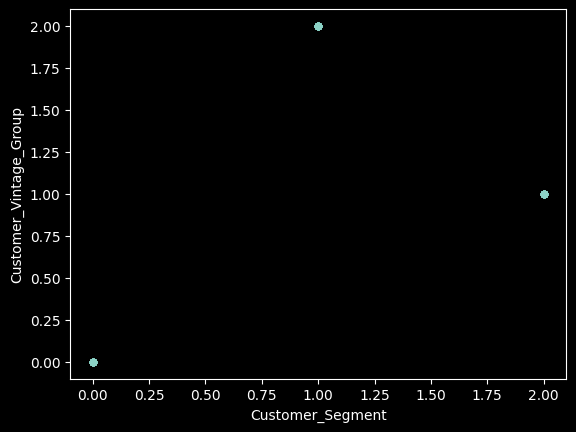

In [ ]:
final.plot(kind="scatter", x="Customer_Segment", y="Customer_Vintage_Group", colormap="YlGnBu", alpha=0.75)

c:\Users\LARRY\anaconda3\envs\tech-interview\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Credit_Limit', ylabel='Card_Family'>

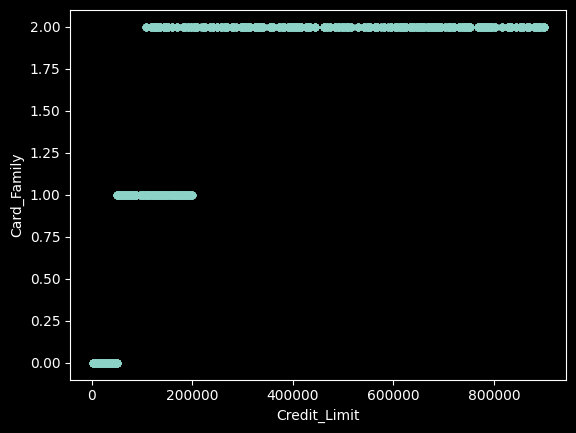

In [353]:
final.plot(kind="scatter", x="Credit_Limit", y="Card_Family", colormap="twilight", alpha=0.75)

# Questions we can ask
as credit limit and card family seem to be intertwined we can ask: *what is the mean credit limit for each card family?*. Other questions we can ask (non-exhaustive) that might give us insight to the data we have are the ff:
* what customers flagged with fraudulent transactions is their most common card family?
* what customers flagged with fraudulent transactions is their most common customer segment?
* what customers flagged with fraudulent transactions is their most common customer vintage group?
* what is the mean, max, and min, transaction value of customers flagged with fraudulent transactions?
* conversely what is the mean, max, and min transaction value of customers with no fraudulent transactions?


In [354]:
CreditCard = pd.concat([final[num_cols], decoded], axis=1)

In [355]:
ps.sqldf("SELECT * FROM CreditCard")

Transaction_Value  Fraud_Flag  Age  Credit_Limit Transaction_ID  \
0                 23649         0.0   23      194000.0   CTID28830551   
1                 26726         0.0   48       15000.0   CTID45504917   
2                 22012         0.0   23        2000.0   CTID47312290   
3                 37637         0.0   44       19000.0   CTID25637718   
4                  5113         0.0   42      417000.0   CTID66743960   
...                 ...         ...  ...           ...            ...   
9995              44280         0.0   39      656000.0   CTID25037573   
9996              27163         0.0   39       12000.0   CTID43832298   
9997              36424         0.0   38       34000.0   CTID56532072   
9998               8464         0.0   25      129000.0   CTID88101446   
9999               7606         0.0   42       10000.0   CTID64730271   

                Transaction_Date       Credit_Card_ID Transaction_Segment  \
0     2016-04-24 00:00:00.000000  1629-9566-3285-2123               SEG25   
1     2016-02-11 00:00:00.000000  3697-6001-4909-5350               SEG16   
2     2016-11-01 00:00:00.000000  5864-4475-3659-1440               SEG14   
3     2016-01-28 00:00:00.000000  5991-4421-8476-3804               SEG17   
4     2016-03-17 00:00:00.000000  1893-8853-9900-8478               SEG14   
...                          ...                  ...                 ...   
9995  2016-06-10 00:00:00.000000  9157-2802-8374-1145               SEG18   
9996  2016-05-23 00:00:00.000000  7416-4529-6690-5703               SEG12   
9997  2016-08-06 00:00:00.000000  6699-2639-4522-6219               SEG13   
9998  2016-10-10 00:00:00.000000  8341-5263-4582-7396               SEG14   
9999  2016-06-18 00:00:00.000000  1947-8602-1695-7503               SEG15   

      Cust_ID Customer_Segment Customer_Vintage_Group Card_Family  
0     CC24544             Gold                    VG3    Platinum  
1     CC62261             Gold                    VG3        Gold  
2     CC99402          Diamond                    VG1        Gold  
3     CC14871         Platinum                    VG2        Gold  
4     CC11165             Gold                    VG3     Premium  
...       ...              ...                    ...         ...  
9995  CC59562         Platinum                    VG2     Premium  
9996  CC60164          Diamond                    VG1        Gold  
9997  CC85028             Gold                    VG3        Gold  
9998  CC81000         Platinum                    VG2    Platinum  
9999  CC26034         Platinum                    VG2        Gold  

[10000 rows x 12 columns]

#### question 1: what customers flagged with fraudulent transactions is their most common card family?

In [356]:
card_family = ps.sqldf("""
    SELECT Card_Family, COUNT(Card_Family) AS Fraud_Card_Family_Occ FROM CreditCard
    WHERE Fraud_Flag = 1.0
    GROUP BY Card_Family
""")
card_family

Card_Family  Fraud_Card_Family_Occ
0        Gold                     39
1    Platinum                     25
2     Premium                     45

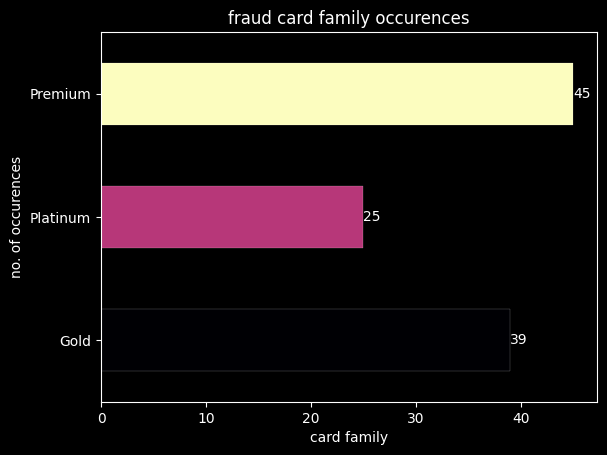

In [414]:
cmap = mpl.colormaps["magma"]
card_family_ax = card_family.plot(
    kind="barh", 
    x="Card_Family",
    y="Fraud_Card_Family_Occ",
    color=cmap(np.linspace(0, 1, card_family.shape[0])), 
    edgecolor='white',
    linewidth=0.125,
    legend=False,
)
card_family_ax.bar_label(card_family_ax.containers[0])
card_family_ax.set_ylabel("no. of occurences", )
card_family_ax.set_xlabel("card family", )
card_family_ax.set_title("fraud card family occurences", )
plt.savefig(f'./figures & images/fraud_card_family_occ.png')

#### question 2: what customers flagged with fraudulent transactions is their most common customer segment?

In [358]:
customer_segment = ps.sqldf("""
    SELECT Customer_Segment, COUNT(Customer_Segment) AS Fraud_Customer_Segment_Occ FROM CreditCard
    WHERE Fraud_Flag = 1.0
    GROUP BY Customer_Segment
""")
customer_segment

Customer_Segment  Fraud_Customer_Segment_Occ
0          Diamond                          54
1             Gold                          27
2         Platinum                          28

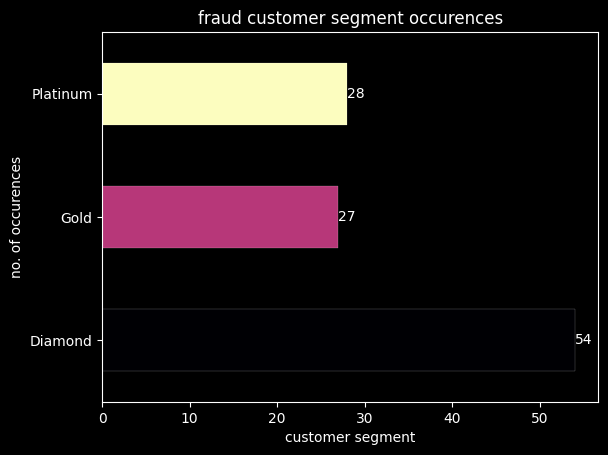

In [413]:
cmap = mpl.colormaps["magma"]
customer_segment_ax = customer_segment.plot(
    kind="barh", 
    x="Customer_Segment",
    y="Fraud_Customer_Segment_Occ",
    color=cmap(np.linspace(0, 1, customer_segment.shape[0])), 
    edgecolor='white',
    linewidth=0.125,
    legend=False,
)
customer_segment_ax.bar_label(customer_segment_ax.containers[0])
customer_segment_ax.set_ylabel("no. of occurences", )
customer_segment_ax.set_xlabel("customer segment", )
customer_segment_ax.set_title("fraud customer segment occurences", )
plt.savefig(f'./figures & images/fraud_customer_segment_occ.png')

#### question 3: what customers flagged with fraudulent transactions is their most common customer vintage group?

In [360]:
customer_vintage_group = ps.sqldf("""
    SELECT Customer_Vintage_Group, COUNT(Customer_Vintage_Group) AS Fraud_Customer_Vintage_Group_Occ FROM CreditCard
    WHERE Fraud_Flag = 1.0
    GROUP BY Customer_Vintage_Group
""")
customer_vintage_group

Customer_Vintage_Group  Fraud_Customer_Vintage_Group_Occ
0                    VG1                                54
1                    VG2                                28
2                    VG3                                27

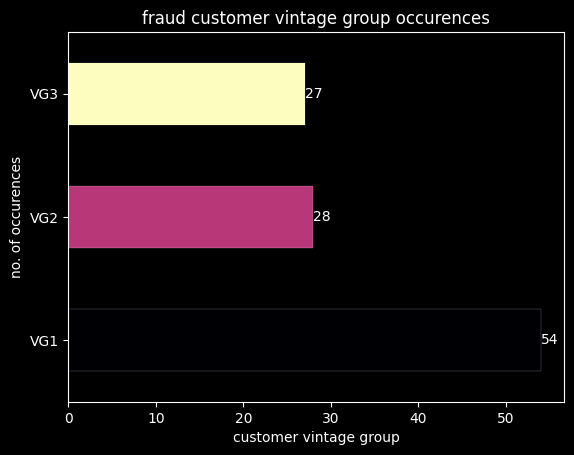

In [412]:
cmap = mpl.colormaps["magma"]
customer_vintage_group_ax = customer_vintage_group.plot(
    kind="barh", 
    x="Customer_Vintage_Group",
    y="Fraud_Customer_Vintage_Group_Occ",
    color=cmap(np.linspace(0, 1, customer_vintage_group.shape[0])), 
    edgecolor='white',
    linewidth=0.125,
    legend=False,
)
customer_vintage_group_ax.bar_label(customer_vintage_group_ax.containers[0])
customer_vintage_group_ax.set_ylabel("no. of occurences", )
customer_vintage_group_ax.set_xlabel("customer vintage group", )
customer_vintage_group_ax.set_title("fraud customer vintage group occurences", )
plt.savefig(f'./figures & images/fraud_customer_vintage_group_occ.png')

#### question 4: what is the mean, max, and min, transaction value of customers flagged with fraudulent transactions?

In [362]:
fraud_transactions = ps.sqldf("""
    SELECT AVG(Transaction_Value) AS Fraud_Mean_Transaction_Value,
    MAX(Transaction_Value) AS Fraud_Max_Transaction_Value,
    MIN(Transaction_Value) AS Fraud_Min_Transaction_Value
    FROM CreditCard
    WHERE Fraud_Flag = 1.0
    GROUP BY Fraud_Flag
""")
fraud_transactions

Fraud_Mean_Transaction_Value  Fraud_Max_Transaction_Value  \
0                  26808.880734                        49155   

   Fraud_Min_Transaction_Value  
0                          683

In [363]:
transactions = ps.sqldf("""
    SELECT AVG(Transaction_Value) AS Mean_Transaction_Value,
    MAX(Transaction_Value) AS Max_Transaction_Value,
    MIN(Transaction_Value) AS Min_Transaction_Value
    FROM CreditCard
    WHERE Fraud_Flag = 0.0
    GROUP BY Fraud_Flag
""")
transactions

Mean_Transaction_Value  Max_Transaction_Value  Min_Transaction_Value
0            24736.148519                  49995                    103

#### Based on the answers to these questions the card family that seems to have the most fraudulent transactions is from the diamond card family. From here we can ask further questions such as *what other credit card holders with same customer vintage group, customer sement, cand card family values have the highest percentage of fraud?*

In [ ]:
fraud_cust_profile = ps.sqldf("""
    SELECT Customer_Vintage_Group, Customer_Segment, Card_Family , COUNT(*) AS Fraud_Customer_Profile_Occ FROM CreditCard
    WHERE Fraud_Flag = 1.0
    GROUP BY Customer_Vintage_Group, Customer_Segment, Card_Family
    ORDER BY Fraud_Customer_Profile_Occ DESC
""")
fraud_cust_profile

Customer_Vintage_Group Customer_Segment Card_Family  \
0                    VG1          Diamond        Gold   
1                    VG1          Diamond     Premium   
2                    VG3             Gold     Premium   
3                    VG2         Platinum     Premium   
4                    VG1          Diamond    Platinum   
5                    VG2         Platinum    Platinum   
6                    VG3             Gold        Gold   
7                    VG2         Platinum        Gold   
8                    VG3             Gold    Platinum   

   Fraud_Customer_Profile_Occ  
0                          25  
1                          18  
2                          15  
3                          12  
4                          11  
5                          10  
6                           8  
7                           6  
8                           4

In [396]:
labels = list(fraud_cust_profile[["Customer_Vintage_Group", "Customer_Segment", "Card_Family"]].itertuples(index=False, name=None))
labels

[('VG1', 'Diamond', 'Gold'),
 ('VG1', 'Diamond', 'Premium'),
 ('VG3', 'Gold', 'Premium'),
 ('VG2', 'Platinum', 'Premium'),
 ('VG1', 'Diamond', 'Platinum'),
 ('VG2', 'Platinum', 'Platinum'),
 ('VG3', 'Gold', 'Gold'),
 ('VG2', 'Platinum', 'Gold'),
 ('VG3', 'Gold', 'Platinum')]

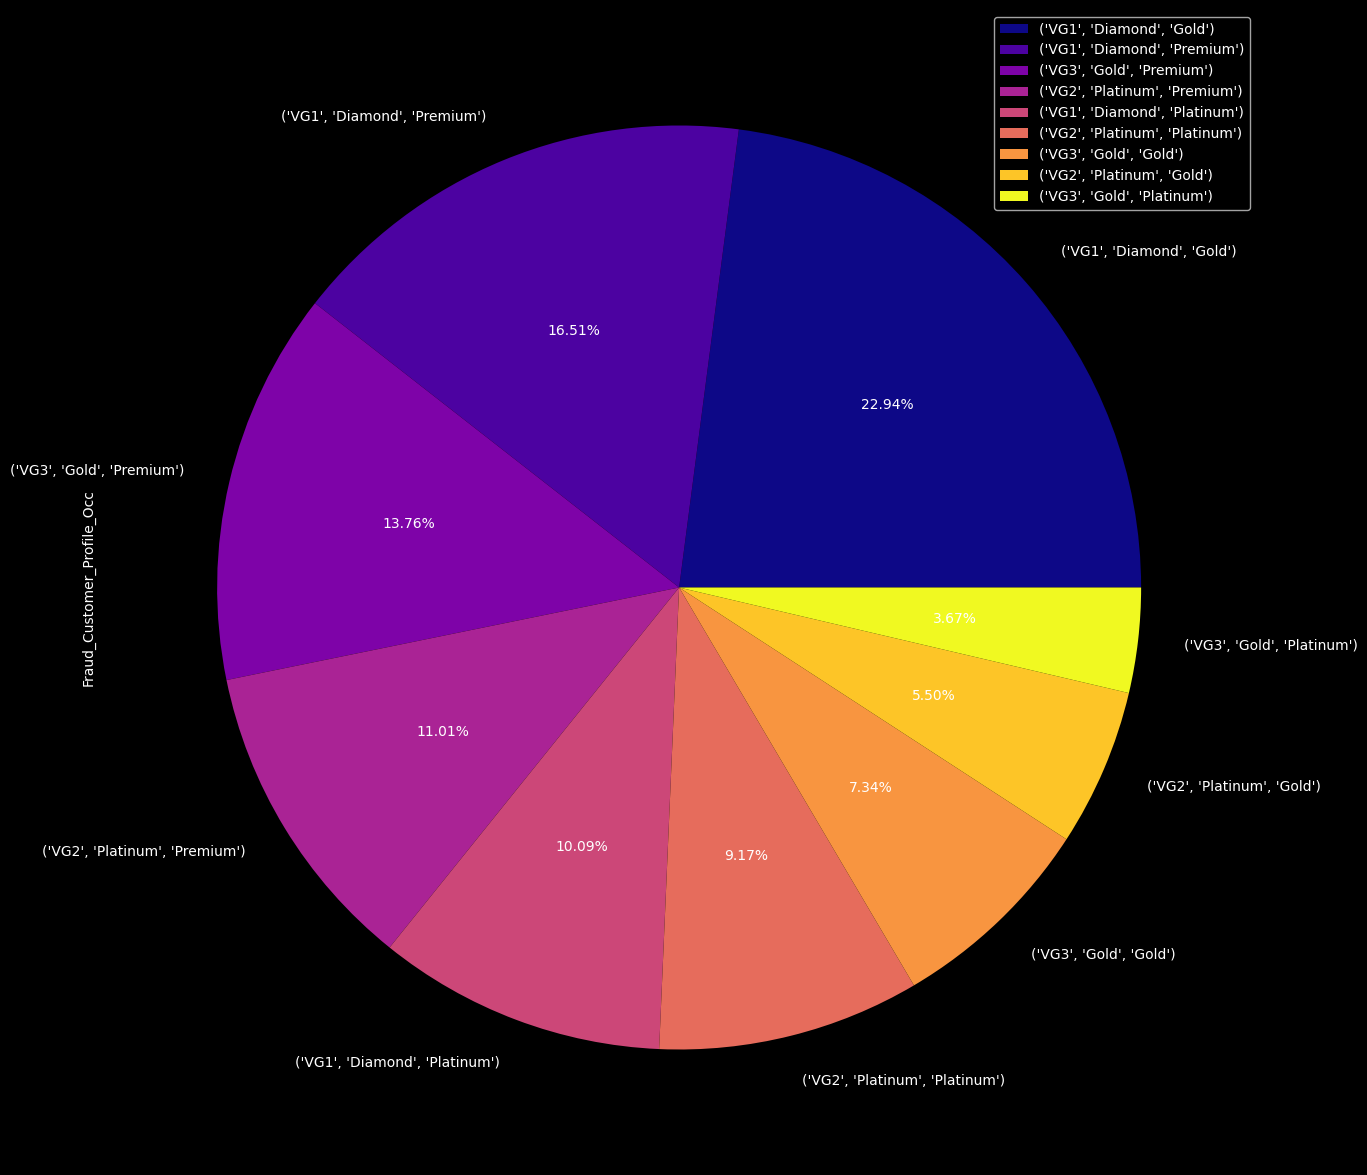

In [411]:
cmap = mpl.colormaps["plasma"]
fraud_cust_profile_ax = fraud_cust_profile.plot(
    kind="pie",
    y="Fraud_Customer_Profile_Occ",
    labels=labels,
    autopct='%.2f%%',
    legend=True,
    figsize=(15, 15), 
    textprops={"color": "white"}, 
    colors=cmap(np.linspace(0, 1, len(labels)))
)
plt.savefig(f'./figures & images/fraud_cust_profiles.png')